# Recommendation System

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('netflix_data (1).csv')

In [78]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [79]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [80]:
df.shape

(8807, 12)

In [81]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

1. **`show_id`** – A unique identifier for each movie or TV show.  
2. **`type`** – Specifies whether the content is a *Movie* or a *TV Show*.  
3. **`title`** – The name of the movie or TV show.  
4. **`director`** – Name of the director(s) who created the movie or show.  
5. **`cast`** – A list of main actors/actresses in the movie or show.  
6. **`country`** – The country where the movie or TV show was produced.  
7. **`date_added`** – The date the content was added to the platform.  
8. **`release_year`** – The year when the movie or TV show was originally released.  
9. **`rating`** – The age classification (e.g., PG, R, TV-MA) assigned to the content.  
10. **`duration`** – The length of the content (e.g., *90 min* for movies, *3 Seasons* for TV shows).  
11. **`listed_in`** – Genres/categories the content belongs to (e.g., *Drama, Comedy*).  
12. **`description`** – A short summary or synopsis of the movie or TV show.  

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [85]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [86]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [87]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [88]:
df = df.dropna()

In [89]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [90]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Numerical type columns:
Index(['release_year'], dtype='object')


In [91]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 40:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [92]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [93]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['type', 'rating']
Non-Categorical Features: ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'duration', 'listed_in', 'description']
Discrete Features: []
Continuous Features: ['release_year']


In [94]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

type
['Movie' 'TV Show']

rating
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']



In [95]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

type
type
Movie      6128
TV Show    2666
Name: count, dtype: int64

rating
rating
TV-MA       3209
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64



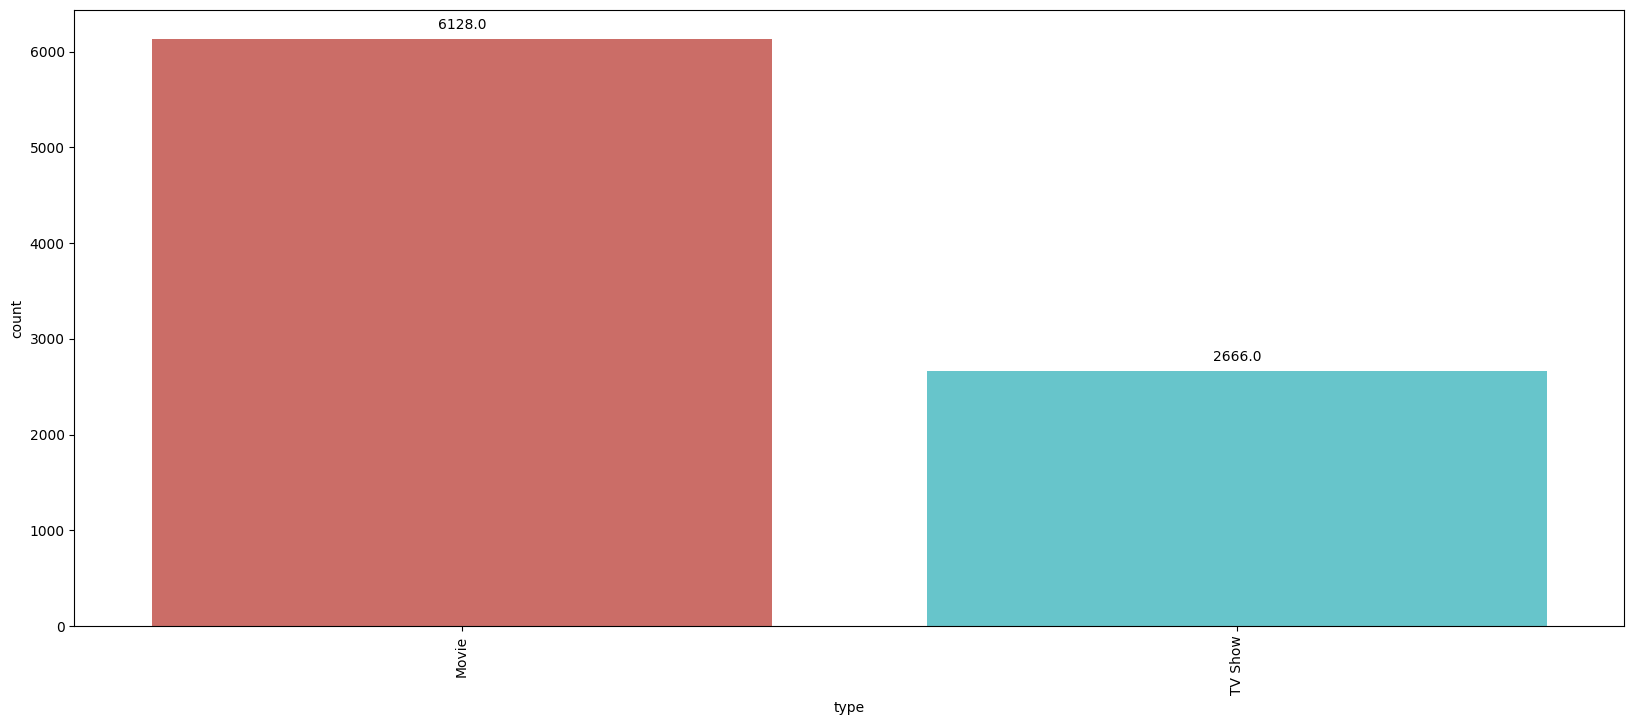

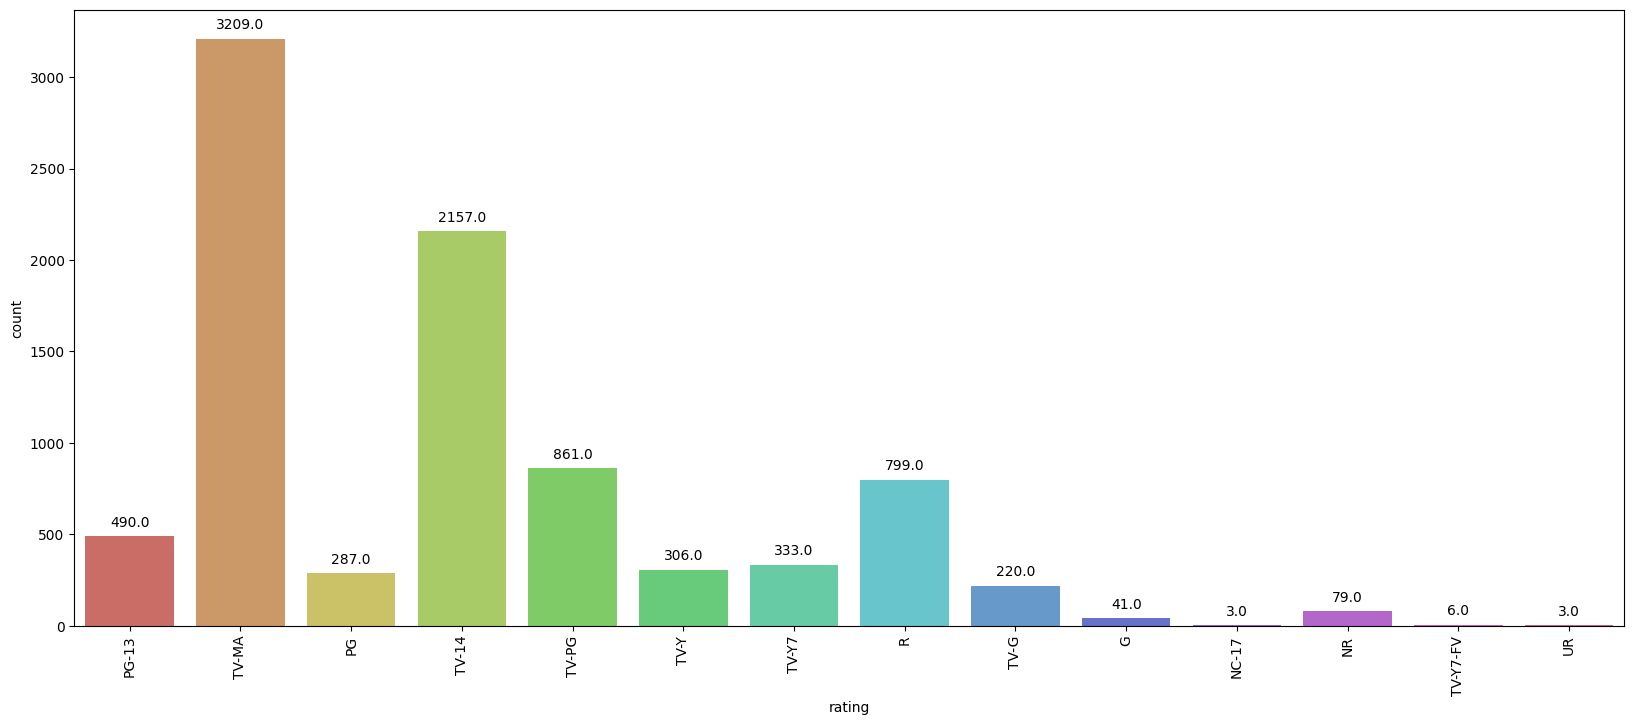

In [96]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.xticks(rotation = 90)
    plt.show()

In [97]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [98]:
import plotly.graph_objects as go

movie_counts = df['release_year'].value_counts().sort_index()

fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)',  
    font_color='white', 
    title='Number of Movies Released Each Year',  
    xaxis=dict(title='Year'),  
    yaxis=dict(title='Number of Movies')
)
fig.update_traces(marker_color='red')
fig.show()

In [99]:
import plotly.graph_objects as go

movie_type_counts = df['type'].value_counts()

fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Distribution of Content Types',
)
fig.update_traces(marker=dict(colors=['red', 'blue']))  

fig.show()

In [100]:
import plotly.express as px

top_countries = df['country'].value_counts().head(10)

fig = px.treemap(
    names=top_countries.index, 
    parents=["" for _ in top_countries.index], 
    values=top_countries.values
)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Top Countries with Highest Number of Movies',
)

fig.show()

In [101]:
country_movie_counts = df['country'].value_counts().reset_index()
country_movie_counts.columns = ['Country', 'Movie Count']

fig = px.choropleth(
    data_frame=country_movie_counts, 
    locations='Country', 
    locationmode='country names',
    color='Movie Count', 
    title='Number of Movies Released By Country',
    color_continuous_scale='Reds', 
    range_color=(0, country_movie_counts['Movie Count'].max()),
    labels={'Movie Count': 'Number of Movies'}
)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white'
)

fig.show()

In [102]:
ratings = list(df['rating'].value_counts().index)
rating_counts = list(df['rating'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

In [103]:
durations = list(df['duration'].value_counts().index)
duration_counts = list(df['duration'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=durations,
    y=duration_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Duration',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

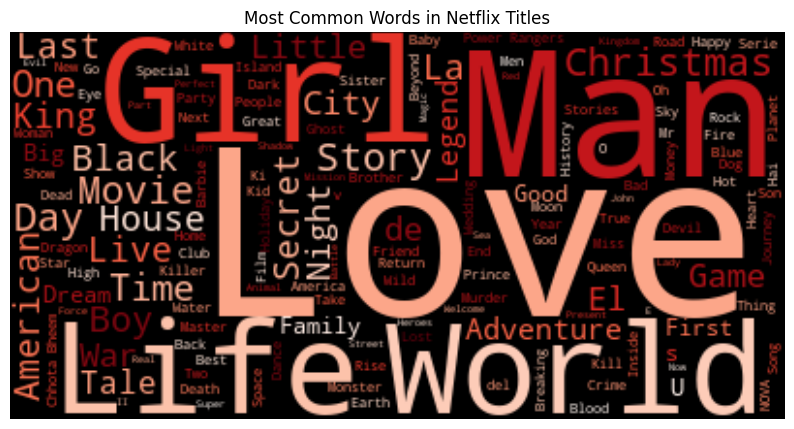

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

titles = df['title'].dropna().values  

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='black')
plt.show()

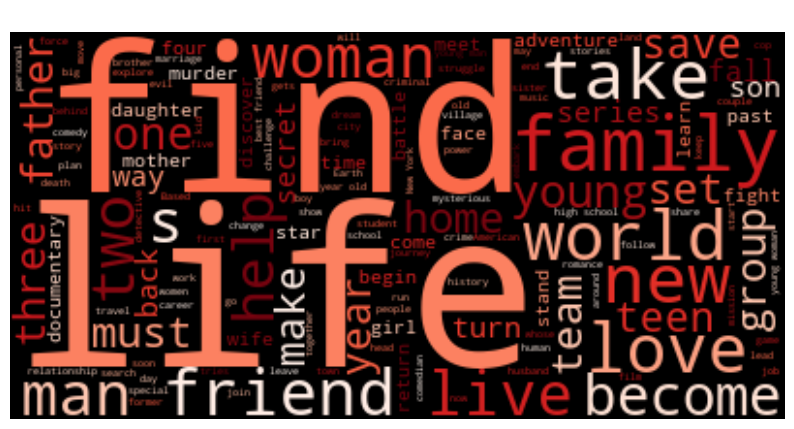

In [105]:
descriptions = df['description'].dropna().values  

text = ' '.join(descriptions)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [107]:
df['combined_features'] = df['title'] + " " + df['listed_in'] + " " + df['description']

In [108]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [109]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [110]:
def recommend_movies(title, df, cosine_sim):
    idx = df[df['title'] == title].index

    if len(idx) == 0:
        return "Title not found in dataset. Please try another movie/show."

    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  

    movie_indices = [i[0] for i in sim_scores]
    return df.iloc[movie_indices][['title', 'listed_in', 'description']]

In [111]:
print(recommend_movies("Kota Factory", df, cosine_sim))

                                   title  \
3461                  Cheese in the Trap   
5412                      Criminal Minds   
4265                Single Ladies Senior   
8334             The Great Train Robbery   
2362                      The Politician   
805                          Racket Boys   
2447                     Dear My Friends   
8165                              Teresa   
749                        L.A.’s Finest   
7632  O-Negative, Love Can’t Be Designed   

                                              listed_in  \
3461  International TV Shows, Korean TV Shows, Roman...   
5412            Crime TV Shows, TV Dramas, TV Mysteries   
4265  International TV Shows, Romantic TV Shows, TV ...   
8334  British TV Shows, Crime TV Shows, Internationa...   
2362              TV Comedies, TV Dramas, Teen TV Shows   
805      International TV Shows, TV Comedies, TV Dramas   
2447  International TV Shows, Korean TV Shows, TV Dr...   
8165  International TV Shows, Romantic TV S